In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.neighbors import DistanceMetric
from sklearn.metrics.pairwise import pairwise_distances
from sklearn import cluster
from sklearn.decomposition.pca import PCA
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn import preprocessing
from definitions import *

In [2]:
def angsep(ra1,dec1,ra2,dec2):
    SEP = numpy.cos(dec1*numpy.pi/180)*numpy.cos(dec2*numpy.pi/180)*numpy.cos((ra1-ra2)*numpy.pi/180)
    SEP += numpy.sin(dec1*numpy.pi/180)*numpy.sin(dec2*numpy.pi/180) #returns values between 0 and pi radians
    SEP = numpy.arccos(SEP)
    return SEP*180./numpy.pi

In [3]:
pd_common_gevtevxmm = pd.read_csv("markeddata/pd_gevtevxmm_simbadclasses_normalized.txt", sep='\t')

In [4]:
pd_common_gevtevxmm = pd_common_gevtevxmm.loc[:, ~pd_common_gevtevxmm.columns.str.contains('^Unnamed')]

In [5]:
spectra_columns = list_xmm_spectra_columns() + list_gev_spectrum_columns() + list_tev_spectrum_columns()
other_columns = list_xmm_other_columns() + list_gev_other_columns() + list_tev_other_columns()

In [6]:
pd_common_gevtevxmm[pd_common_gevtevxmm['marked'] == 1]

,xmm_SC_EP_1_FLUX,xmm_SC_EP_2_FLUX,xmm_SC_EP_3_FLUX,xmm_SC_EP_4_FLUX,xmm_SC_EP_5_FLUX,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,...,tev_3TeV,tev_10TeV,tev_30TeV,xmm_IAUNAME,xmm_WEBPAGE_URL,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,marked
190,0.000000e+00,0.000000e+00,6.632299e-06,0.000000,0.000071,0.013690,0.204137,0.312608,0.093654,0.304314,...,0.000137,0.000004,6.519327e-07,b'3XMM J024005.3+611247',b'http://xmm-catalog.irap.omp.eu/source/205059...,b'1FGL J0240.5+6113 ',b'HMB ',b'',b'bin',1
1012,4.811868e-06,1.679602e-05,9.474194e-06,0.000002,0.000000,0.006440,0.223305,0.306309,0.087983,0.351827,...,0.000109,0.000013,2.910898e-06,b'3XMM J101826.8-585838',b'http://xmm-catalog.irap.omp.eu/source/206943...,b'1FGL J1018.6-5856 ',b'HMB ',b'1FGL J1018.6-5856',b'bin',1
4158,3.473534e-07,4.605986e-08,5.749332e-07,0.000015,0.000031,0.004865,0.074962,0.198091,0.022095,0.130336,...,0.003015,0.000141,5.012074e-06,b'3XMM J182549.2-145024',b'http://xmm-catalog.irap.omp.eu/source/202029...,b'1FGL J1826.2-1450 ',b'HMB ',b'',b'bin',1
4667,4.073749e-07,1.218059e-06,1.198334e-05,0.000053,0.000028,0.022407,0.362226,0.111720,0.253923,0.249629,...,0.000000,0.000000,0.000000e+00,b'3XMM J203145.8+412815',b'http://xmm-catalog.irap.omp.eu/source/203055...,b'1FGL J2032.2+4127 ',b'PSR ',b'',b'unid',1


In [7]:
def show_marked_spectra(spectra_columns, spectra):
    plt.clf()
    fig, ax = plt.subplots(figsize=(16,6))
    marked_spectra = spectra[spectra['marked'] == 1]
    
    for i in range(0,len(marked_spectra)):
        table = marked_spectra[spectra_columns].iloc[i]
        values = table.values

        spectra_points_number = len(spectra_columns)
        plt.xticks(())
        #if i == 0:
        #    plt.setp([plt], title='Normalized columns')
        if i == 3:
            #plt.set_xlabel('optics - gev - tev')
            plt.xticks(range(spectra_points_number), spectra_columns,rotation=45)
        ax.plot(range(len(values)), marked_spectra[spectra_columns].iloc[i].values, label=marked_spectra['gev_1FGL_Name'].values[i])
        legend = ax.legend(loc = 'upper right')   
    plt.show()

<Figure size 432x288 with 0 Axes>

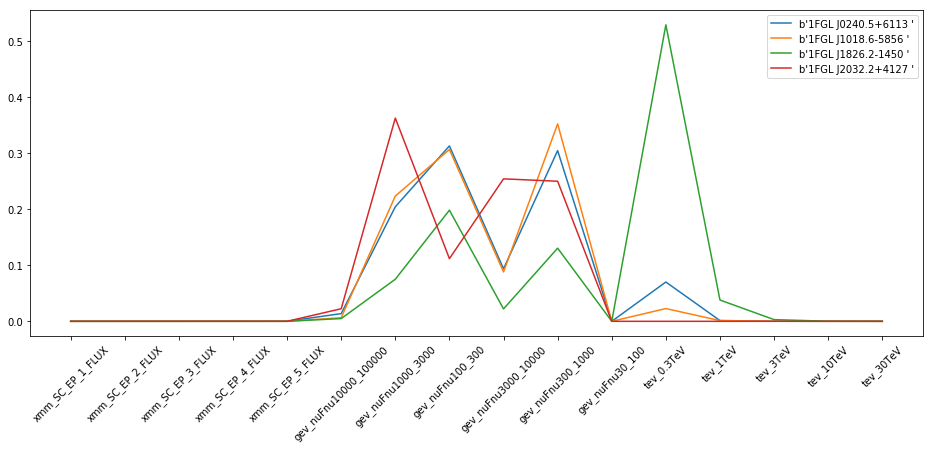

In [8]:
show_marked_spectra(spectra_columns, pd_common_gevtevxmm)

<Figure size 432x288 with 0 Axes>

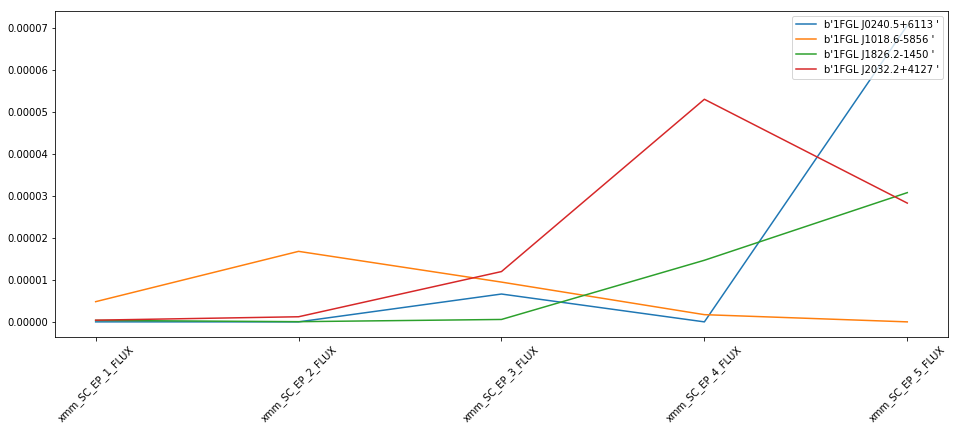

In [9]:
show_marked_spectra(list_xmm_spectra_columns(), pd_common_gevtevxmm)

<Figure size 432x288 with 0 Axes>

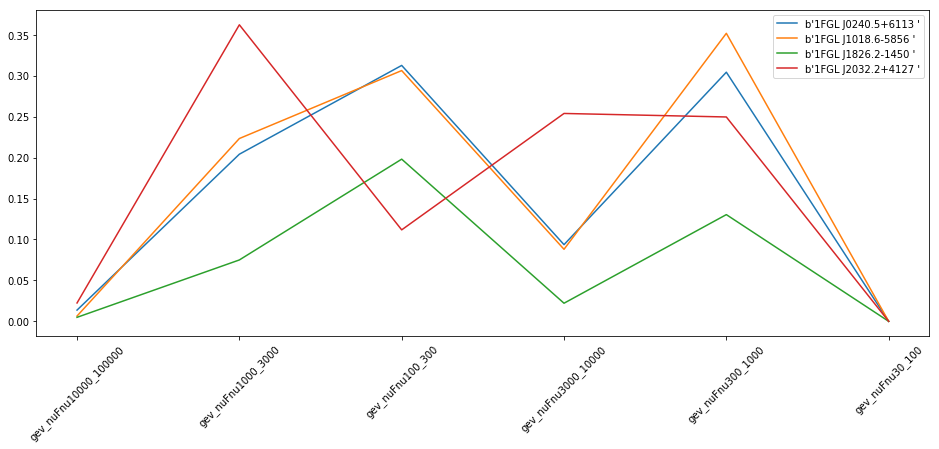

In [10]:
show_marked_spectra(list_gev_spectrum_columns(), pd_common_gevtevxmm)

<Figure size 432x288 with 0 Axes>

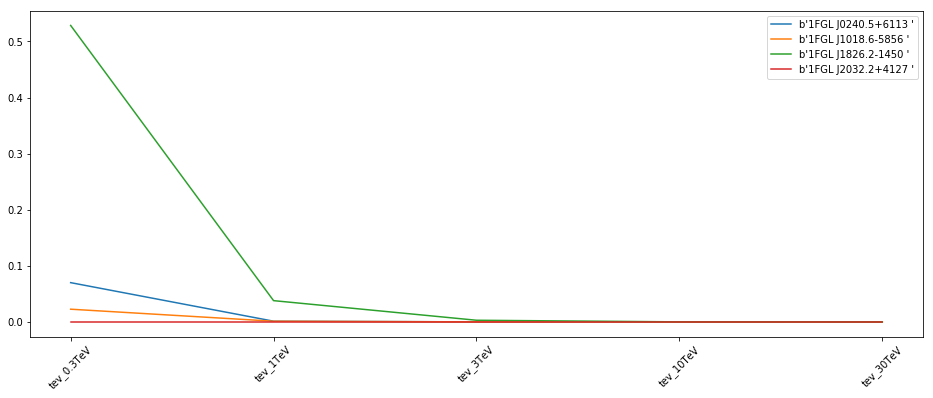

In [11]:
show_marked_spectra(list_tev_spectrum_columns(), pd_common_gevtevxmm)